# 5. Data Modeling: non-artificial neural network models; RFC

LOCAL version for implement scikit-learn ML models

## Environment Setup

In [1]:
# libraries import
import os # miscellaneous operating system interfaces
import numpy as np # Array library for linear algebra
import matplotlib.pyplot as plt # visualization library
from sklearn.svm import SVC # SVM classifier
from sklearn.ensemble import RandomForestClassifier # RFC classifier
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn.metrics import classification_report # evaluators classification report
import scikitplot as skplt # scikit-learn and matplotlib integrated visualization library
import joblib # I/O library for scikit-learn

# system configuration
os.environ["TF_CPP_MIN_LOG_LEVEL"]="0" # disable warning messages
os.environ['AUTOGRAPH_VERBOSITY'] = '0' # set it to 0
random_seed = 20 # random seed

print('\n')
print('necessary libraries has successfully imported')



necessary libraries has successfully imported


## Data Loading

In [2]:
# define path to files
defaultdir = '/Users/pnastra_castcle/navavat.pi@castcle.com - Google Drive/My Drive/all_about_phd_research/'

In [3]:
print('loading processed data')
print('\n')

# load input data from drive
X_train = np.load(defaultdir + '/processed_data/X_train_sk.npy')
X_test = np.load(defaultdir + '/processed_data/X_test_sk.npy')
y_train = np.load(defaultdir + '/processed_data/y_train_sk.npy')
y_test = np.load(defaultdir + '/processed_data/y_test_sk.npy')


print('load data done')
print('\n')

loading processed data


load data done




## SVM model

In [4]:
# define model name
modelName = 'RFC'

print(modelName, 'modeling is initializing')
print('\n')

RFC modeling is initializing




## Data Modeling

In [15]:
# define function to create and training SVM model
def rfcModeling(X_train, y_train,
                n_estimators=512,
                max_depth=None,
                min_samples_leaf=1,
                min_samples_split=2,
                max_leaf_nodes=None, 
                bootstrap=True,  
                n_jobs=1,
                random_state=random_seed, 
                verbose=1,
                class_weight='balanced'):
  
  rfc = RandomForestClassifier(n_estimators=n_estimators,
                               max_depth=max_depth,
                               min_samples_leaf=min_samples_leaf,
                               min_samples_split=min_samples_split,
                               max_leaf_nodes=max_leaf_nodes, 
                               bootstrap=bootstrap, 
                               n_jobs=n_jobs,
                               random_state=random_state, 
                               verbose=verbose, 
                               class_weight=class_weight)
  
  print(modelName, 'model is successfully constructed')
  print('training', modelName, 'model')

  # perform training
  rfcModel = rfc.fit(X= X_train, 
                     y= y_train)

  print('training', modelName, 'model has done')

  return rfcModel

## Model Training

In [16]:
rfcModel = rfcModeling(X_train= X_train, y_train= y_train, n_jobs=-1)

RFC model is successfully constructed
training RFC model


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.2min


training RFC model has done


[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:  3.6min finished


## Model Prediction

In [17]:
# making predictions
print(modelName, 'model making prediction')
print('\n')

y_pred = rfcModel.predict(X_test)
y_probas = rfcModel.predict_proba(X_test)

print('\n')
print(modelName, 'model making prediction has done')
print('\n')

RFC model making prediction




[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 512 out of 512 | elapsed:    0.0s finished




RFC model making prediction has done




[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 512 out of 512 | elapsed:    0.0s finished


# Model Evaluation

In [18]:
print(modelName, 'model evaluation is now processing')
print('\n')

RFC model evaluation is now processing




## Confusion matrix and AUC-ROC curve

In [19]:
# def plot confusion matrix function
def plotConfusionMatrix(y_test=y_test, 
                        y_pred=y_pred, 
                        cmap=plt.cm.Reds, 
                        title='Confusion Matrix of {} model'.format(modelName)):

  # set font sizes
  SMALL_SIZE = 12
  MEDIUM_SIZE = 15
  BIGGER_SIZE = 20

  skplt.metrics.plot_confusion_matrix(y_true=y_test, 
                                      y_pred=y_pred, 
                                      title=title, 
                                      normalize='true', 
                                      figsize=(9,9), 
                                      cmap=cmap, 
                                      title_fontsize= BIGGER_SIZE, 
                                      text_fontsize= BIGGER_SIZE
                                      )

  # save figure
  plt.savefig(defaultdir + '/processed_data/' + title + '.png')

confusion matrix plot




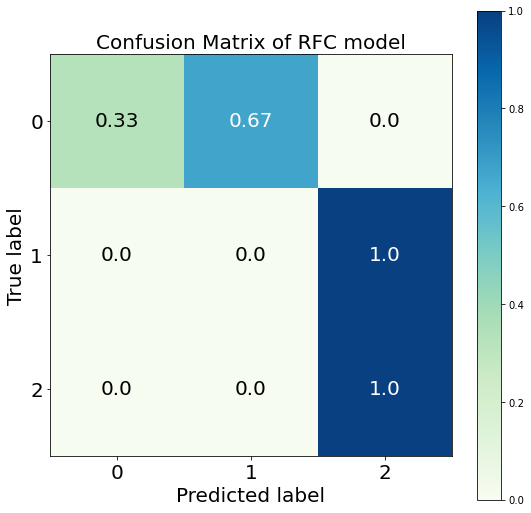

In [20]:
print('confusion matrix plot')
print('\n')

# perform plot confusion matrix function
title = 'Confusion Matrix of {} model'.format(modelName)
plot = plotConfusionMatrix(y_test=y_test, y_pred=y_pred, cmap=plt.cm.GnBu, title=title)

In [21]:
# def plot ROC curve function
def plotROC(y_test=y_test, y_pred=y_pred, cmap=plt.cm.Reds, title='ROC curve of {} model'.format(modelName)):

  # set font sizes
  SMALL_SIZE = 12
  MEDIUM_SIZE = 15
  BIGGER_SIZE = 20

  skplt.metrics.plot_roc(y_true=y_test, 
                         y_probas=y_probas, 
                         title=title, 
                         plot_micro=True, 
                         plot_macro=True, 
                         figsize=(12,6), 
                         cmap=cmap, 
                         title_fontsize= BIGGER_SIZE, 
                         text_fontsize= MEDIUM_SIZE
                         )

  # save figure
  plt.savefig(defaultdir + '/processed_data/' + title + '.png')

AUC-ROC curve plot




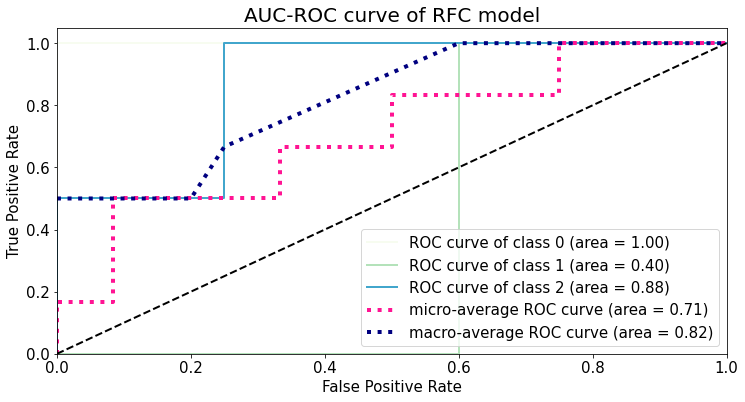

In [22]:
print('AUC-ROC curve plot')
print('\n')

# perform plot AUC-ROC curve function
title = 'AUC-ROC curve of {} model'.format(modelName)
plot = plotROC(y_test=y_test, y_pred=y_pred, cmap=plt.cm.GnBu, title=title)

## Print Classification Report

In [23]:
# classification report
num_classes = 3
class_list = ['class '+ str(y_class) for y_class in range(num_classes)]

print('classification report of {} model'.format(modelName))
print('\n')
print(classification_report(y_test, 
                            y_pred, 
                            target_names= class_list))

print('\n')

classification report of RFC model


              precision    recall  f1-score   support

     class 0       1.00      0.33      0.50         3
     class 1       0.00      0.00      0.00         1
     class 2       0.67      1.00      0.80         2

    accuracy                           0.50         6
   macro avg       0.56      0.44      0.43         6
weighted avg       0.72      0.50      0.52         6





## Saving model

In [24]:
# define saving function
def save_model (model, model_name):
    
    filename = defaultdir + '/processed_data/' + model_name + '.joblib'
        
    joblib.dump(model, filename)

    print("Saved {} to drive".format(model_name))

In [25]:
# perform saving
save_model(model=rfcModel, model_name= modelName.lower() + 'Model')

Saved rfcModel to drive


## Load the saved model

In [26]:
# define loading function
def load_model (model_name):

    filename = defaultdir + '/processed_data/' + model_name + '.joblib'
    
    loaded_model = joblib.load(filename)
    
    return loaded_model

In [27]:
# perform loading
rfcModel = load_model(model_name= modelName.lower() + 'Model')

## Perform testing loaded model

In [28]:
# making prediction of loaded model
rfcModel.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 512 out of 512 | elapsed:    0.0s finished


array([1, 0, 2, 1, 2, 2])

In [29]:
print('\n')
print(modelName, 'modeling process is completed')



RFC modeling process is completed


# Finish Data life cycle